In [14]:
import sys

from src.utils import mol2smi

sys.path.append('..')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import datamol as dm
from src.utils import smi2mol, mol2smi


with dm.without_rdkit_log():
    train = dm.read_csv('../data/raw/train_admet.csv', smiles_column='Drug')
    train.rename(columns={'Drug_ID': 'id', 'Drug': 'smi', 'Y': 'target', 'property': 'prop'}, inplace=True)
    cols = ['id', 'smi','target', 'prop',  'mol']
    train = train[cols].copy().set_index('id')
    
train

,smi,target,prop,mol
id,,,,
0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,1,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1D...
1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,1,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1D...
2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,1,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1D...
3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,1,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1D...
4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,1,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1D...
...,...,...,...,...
7934,O=c1[nH]c2cc(Cl)c(Cl)c([N+](=O)[O-])c2[nH]c1=O,1,3,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1C...
7935,C[S+](CC[C@H](N)C(=O)[O-])C[C@H]1O[C@@H](n2cnc...,1,3,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1C...
7936,CC(Cc1ccccc1)n1cc([N-]C(=O)Nc2ccccc2)[o+]n1,1,3,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1C...


In [16]:
with dm.without_rdkit_log():
    test = dm.read_csv('../data/raw/test_data.csv', smiles_column='Drug')
    test.rename(columns={'Drug_ID': 'id', 'Drug': 'smi', 'property': 'prop'}, inplace=True)
    cols = ['id', 'smi','prop',  'mol']
    test = test[cols].copy().set_index('id')
    
test

,smi,prop,mol
id,,,
0,Cc1cc(=O)oc2ccc3c(c12)C1(C)OOC1(C)O3,1,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1C...
1,CN(CC(O)CO)N=O,1,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1C...
2,O=[N+]([O-])c1ccc(OC2CO2)cc1,1,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1C...
3,Cn1cnc2cc([N+](=O)[O-])ccc21,1,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1C...
4,CC[C@H](CO)NCCN[C@H](CC)CO,1,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1C...
...,...,...,...
1216,CCN(CC)C(=O)COc1cc2c(O)c3c(O)c(C)c4c(c13)C(=O)...,3,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1C...
1217,O=C(Cc1ccc(Cl)c(Cl)c1)N1CCc2sccc2[C@H]1CN1CCCC1,3,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1C...
1218,CN1CC[C@]23c4c5ccc(O)c4O[C@H]2C(=O)CC[C@H]3[C@...,3,<rdkit.Chem.rdchem.Mol object at 0x000001EEF1C...


In [17]:
import mols2grid

mols2grid.display(train.mol)

MolGridWidget()

In [18]:
mask = train.smi.str.contains('[.]')
mask.sum()

78

In [19]:
mols2grid.display(train.mol[mask])

MolGridWidget()

In [20]:
# preprocess
from rdkit.Chem.MolStandardize.rdMolStandardize import SuperParentInPlace

with dm.without_rdkit_log():
    SuperParentInPlace(train.mol, numThreads=16)
    SuperParentInPlace(test.mol, numThreads=16)
    
mols2grid.display(train.mol[mask])    

MolGridWidget()

In [21]:
train.smi = train.mol.apply(mol2smi)
test.smi = test.mol.apply(mol2smi)

In [29]:
train.to_csv('../data/processed/train.csv')
test.to_csv('../data/processed/test.csv')

# EDA

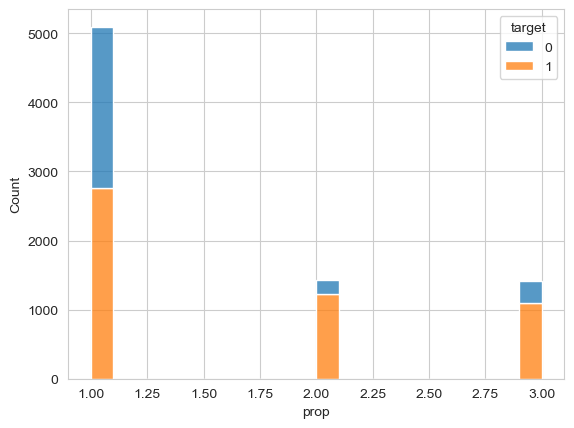

In [23]:
import seaborn as sns

sns.histplot(train, x='prop', hue='target', multiple='stack');

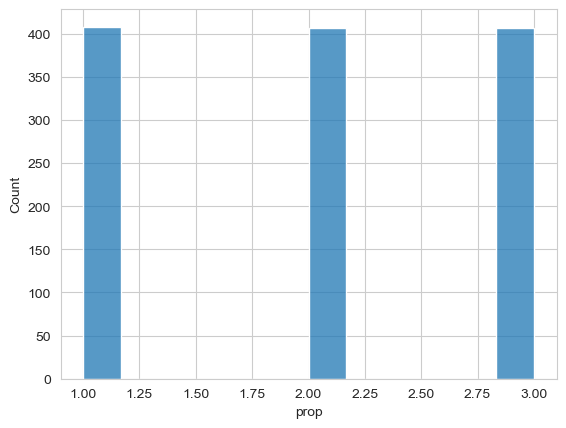

In [24]:
sns.histplot(test, x='prop');

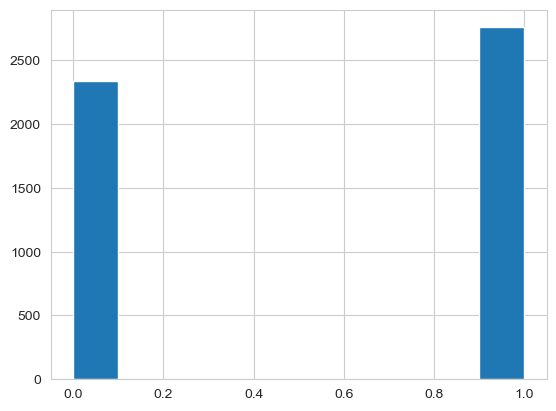

In [25]:
train.query('prop == 1').target.hist();